In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import sklearn as skl
import sklearn.preprocessing as preprocessing
from sklearn.linear_model import LogisticRegression
import sklearn.cross_validation as cross_validation
import sklearn.metrics as metrics
import sklearn.tree as tree
from sklearn.neighbors import KNeighborsClassifier

In [5]:
df=pd.read_csv('adult.csv')
df = df[df.occupation != '?']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30718 entries, 1 to 32560
Data columns (total 15 columns):
age               30718 non-null int64
workclass         30718 non-null object
fnlwgt            30718 non-null int64
education         30718 non-null object
education.num     30718 non-null int64
marital.status    30718 non-null object
occupation        30718 non-null object
relationship      30718 non-null object
race              30718 non-null object
sex               30718 non-null object
capital.gain      30718 non-null int64
capital.loss      30718 non-null int64
hours.per.week    30718 non-null int64
native.country    30718 non-null object
income            30718 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [7]:
df.head()

age workclass  fnlwgt     education  education.num marital.status  \
1   82   Private  132870       HS-grad              9        Widowed   
3   54   Private  140359       7th-8th              4       Divorced   
4   41   Private  264663  Some-college             10      Separated   
5   34   Private  216864       HS-grad              9       Divorced   
6   38   Private  150601          10th              6      Separated   

          occupation   relationship   race     sex  capital.gain  \
1    Exec-managerial  Not-in-family  White  Female             0   
3  Machine-op-inspct      Unmarried  White  Female             0   
4     Prof-specialty      Own-child  White  Female             0   
5      Other-service      Unmarried  White  Female             0   
6       Adm-clerical      Unmarried  White    Male             0   

   capital.loss  hours.per.week native.country income  
1          4356              18  United-States  <=50K  
3          3900              40  United-States  <=50K  
4          3900              40  United-States  <=50K  
5          3770              45  United-States  <=50K  
6          3770              40  United-States  <=50K

In [27]:
for i in df.columns:
    print(df[i].unique())

[82 54 41 34 38 74 68 45 52 32 46 57 22 37 29 61 51 21 33 49 23 59 60 63
 53 44 43 48 71 73 40 50 42 39 55 47 31 58 62 36 67 72 78 83 26 70 27 35
 81 66 65 25 28 56 69 20 30 90 24 64 75 19 77 80 18 17 79 76 88 84 85 86]
['Private' 'State-gov' 'Federal-gov' 'Self-emp-not-inc' 'Self-emp-inc'
 'Local-gov' 'Without-pay']
[132870 140359 264663 ...  84661 257302 201490]
['HS-grad' '7th-8th' 'Some-college' '10th' 'Doctorate' 'Prof-school'
 'Bachelors' 'Masters' '11th' 'Assoc-acdm' 'Assoc-voc' '1st-4th' '5th-6th'
 '12th' '9th' 'Preschool']
[ 9  4 10  6 16 15 13 14  7 12 11  2  3  8  5  1]
['Widowed' 'Divorced' 'Separated' 'Never-married' 'Married-civ-spouse'
 'Married-spouse-absent' 'Married-AF-spouse']
['Exec-managerial' 'Machine-op-inspct' 'Prof-specialty' 'Other-service'
 'Adm-clerical' 'Craft-repair' 'Transport-moving' 'Handlers-cleaners'
 'Sales' 'Farming-fishing' 'Tech-support' 'Protective-serv' 'Armed-Forces'
 'Priv-house-serv']
['Not-in-family' 'Unmarried' 'Own-child' 'Other-relative' 

C:\Users\KULDEEP CHATURVEDI\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


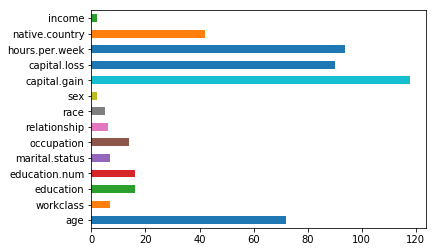

In [8]:
df.ix[:,df.columns!='fnlwgt'].apply(pd.Series.nunique).plot(kind='barh')

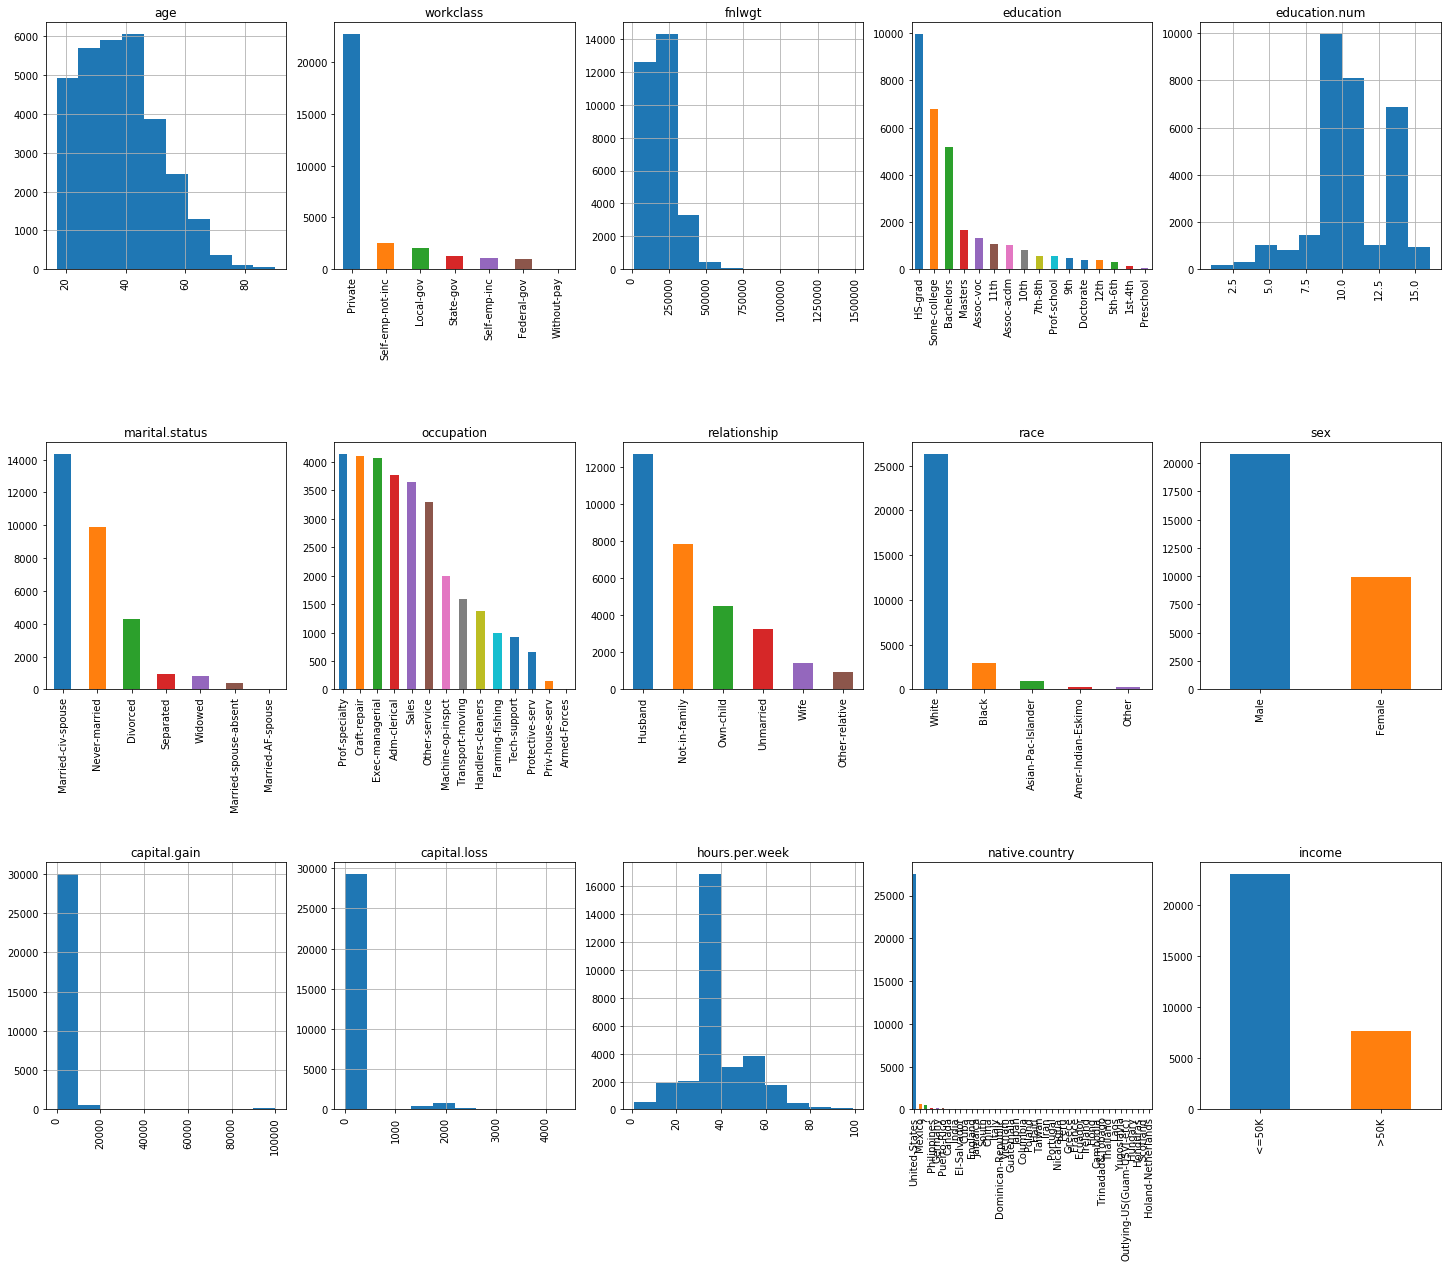

In [9]:
fig=plt.figure(figsize=(25,20))
cols=5
rows=(float(df.shape[1])/cols)
for i,column in enumerate(df.columns):
    ax=fig.add_subplot(rows,cols,i+1)
    ax.set_title(column)
    if df.dtypes[column]==np.object:
        df[column].value_counts().plot(kind="bar", axes=ax)
    else:
        df[column].hist(axes=ax)
        plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.7, wspace=0.2)

In [11]:
df['native.country'].value_counts()

United-States                 27504
Mexico                          610
?                               556
Philippines                     188
Germany                         128
Puerto-Rico                     109
Canada                          107
India                           100
El-Salvador                     100
Cuba                             92
England                          86
Jamaica                          80
South                            71
China                            68
Italy                            68
Dominican-Republic               67
Vietnam                          64
Guatemala                        63
Japan                            59
Columbia                         56
Poland                           56
Haiti                            42
Taiwan                           42
Iran                             42
Portugal                         34
Nicaragua                        33
Peru                             30
Greece                      

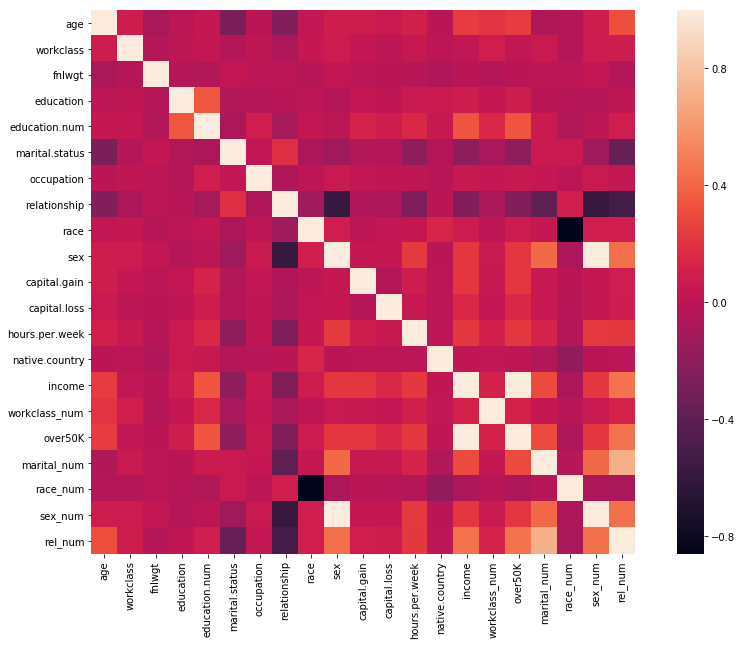

In [25]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders
encoded_data, _ = number_encode_features(df)
plt.figure(figsize=(15,10))
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

In [12]:
df['workclass_num'] = df.workclass.map({'Private':0, 'State-gov':1, 'Federal-gov':2, 'Self-emp-not-inc':3, 'Self-emp-inc':4, 'Local-gov':5, 'Without-pay':6})
df['over50K'] = np.where(df.income == '<=50K', 0, 1)
df['marital_num'] = df['marital.status'].map({'Widowed':0, 'Divorced':1, 'Separated':2, 'Never-married':3, 'Married-civ-spouse':4, 'Married-AF-spouse':4, 'Married-spouse-absent':5})
df['race_num'] = df.race.map({'White':0, 'Black':1, 'Asian-Pac-Islander':2, 'Amer-Indian-Eskimo':3, 'Other':4})
df['sex_num'] = np.where(df.sex == 'Female', 0, 1)
df['rel_num'] = df.relationship.map({'Not-in-family':0, 'Unmarried':0, 'Own-child':0, 'Other-relative':0, 'Husband':1, 'Wife':1})
df.tail()

age workclass  fnlwgt     education  education.num      marital.status  \
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married   

              occupation   relationship   race     sex   ...     capital.loss  \
32556    Protective-serv  Not-in-family  White    Male   ...                0   
32557       Tech-support           Wife  White  Female   ...                0   
32558  Machine-op-inspct        Husband  White    Male   ...                0   
32559       Adm-clerical      Unmarried  White  Female   ...                0   
32560       Adm-clerical      Own-child  White    Male   ...                0   

       hours.per.week  native.country income workclass_num  over50K  \
32556              40   United-States  <=50K             0        0   
32557              38   United-States  <=50K             0        0   
32558              40   United-States   >50K             0        1   
32559              40   United-States  <=50K             0        0   
32560              20   United-States  <=50K             0        0   

       marital_num  race_num  sex_num  rel_num  
32556            3         0        1        0  
32557            4         0        0        1  
32558            4         0        1        1  
32559            0         0        0        0  
32560            3         0        1        0  

[5 rows x 21 columns]

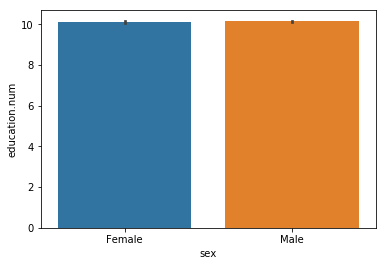

In [50]:
sns.barplot('sex','education.num',data=df)
plt.show()

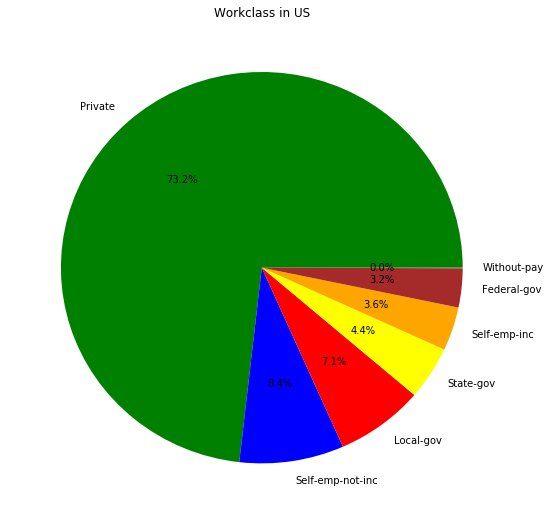

In [48]:
data_us=df[df["native.country"]=="United-States"].workclass
data_us.value_counts()
labels=data_us.value_counts().index
sizes= data_us.value_counts().values
colors=["green","blue","red","yellow","orange","brown","grey"]
explode=[0,0,0,0,0,0,0]
plt.figure(figsize=(9,9))
plt.pie(sizes,explode=explode,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title('Workclass in US')
plt.show()

In [13]:
X=df[['workclass_num', 'education.num', 'marital_num', 'race_num', 'sex_num', 'rel_num', 'capital.gain', 'capital.loss']]
y=df['over50K']
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.2)

In [14]:
cls=LogisticRegression()
cls.fit(X_train,y_train)
y_pred=cls.predict(X_test)

In [15]:
metrics.accuracy_score(y_test,y_pred)

0.8362630208333334

In [19]:
k_range=np.arange(1,26)
scores=[]
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred=knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test,y_pred))
scores.index(max(scores))

13

In [20]:
max(scores)

0.8453776041666666

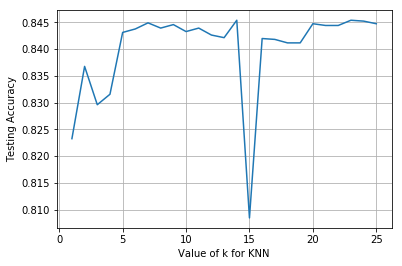

In [23]:
plt.plot(k_range,scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.grid(True)

In [24]:
clf=tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.8527018229166666